### Exploring Data

In [6]:
import pandas as pd
cardata = pd.read_csv('Car_Data.csv')
cardata1 = pd.read_csv('Car_Data.csv')
cardata.shape

(1957, 12)

In [7]:
CD = cardata.iloc[:,1:10]
mean = round(CD.mean(),2)
mean

year               2013.83
selling_price    630717.95
engine_cc          1546.64
mileage_kmpl         18.51
max_power_bhp        97.04
km_driven         69789.93
transmission          0.83
seats                 5.51
owner                 1.46
dtype: float64

In [9]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
CD_pca = pca.fit_transform(CD)
CD_p = pca.fit(CD)

SD = np.sqrt(pca.explained_variance_)
PV = pca.explained_variance_ratio_
index = []
for i in range(len(SD)):
    i = i+1
    index.append("PC{}".format(i))

sum = pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index = index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,692143.063313,9.954080e-01,0.995408
PC2,47008.902278,4.591659e-03,1.000000
PC3,417.643971,3.624281e-07,1.000000
PC4,21.684708,9.770495e-10,1.000000
PC5,3.913046,3.181554e-11,1.000000
PC6,2.655762,1.465506e-11,1.000000
PC7,0.786152,1.284171e-12,1.000000
PC8,0.614770,7.852980e-13,1.000000
PC9,0.312424,2.028138e-13,1.000000


In [10]:
print("Standard Deviation:",SD.round(1))

i = 0
rot_matrix = CD_p.components_.T

rot_df = pd.DataFrame(rot_matrix, index=CD.columns.values, columns=index)
rot_df = round(-rot_df,3)
rot_df

Standard Deviation: [6.921431e+05 4.700890e+04 4.176000e+02 2.170000e+01 3.900000e+00
 2.700000e+00 8.000000e-01 6.000000e-01 3.000000e-01]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
year,-0.000,0.000,-0.001,0.019,0.676,0.730,0.060,-0.076,-0.002
selling_price,-1.000,-0.018,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000
engine_cc,-0.000,-0.004,0.999,0.032,0.004,-0.003,0.002,0.000,0.000
mileage_kmpl,0.000,0.000,-0.006,0.022,0.734,-0.677,-0.042,-0.004,0.013
max_power_bhp,-0.000,-0.000,0.032,-0.999,0.029,0.000,-0.013,-0.001,-0.003
km_driven,0.018,-1.000,-0.004,-0.000,0.000,0.000,0.000,0.000,0.000
transmission,0.000,-0.000,-0.000,0.004,0.008,-0.007,-0.057,-0.015,-0.998
seats,-0.000,-0.000,0.001,0.013,0.007,0.071,-0.995,-0.035,0.057
owner,0.000,-0.000,0.000,-0.002,-0.055,-0.055,0.031,-0.996,0.014


In [11]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


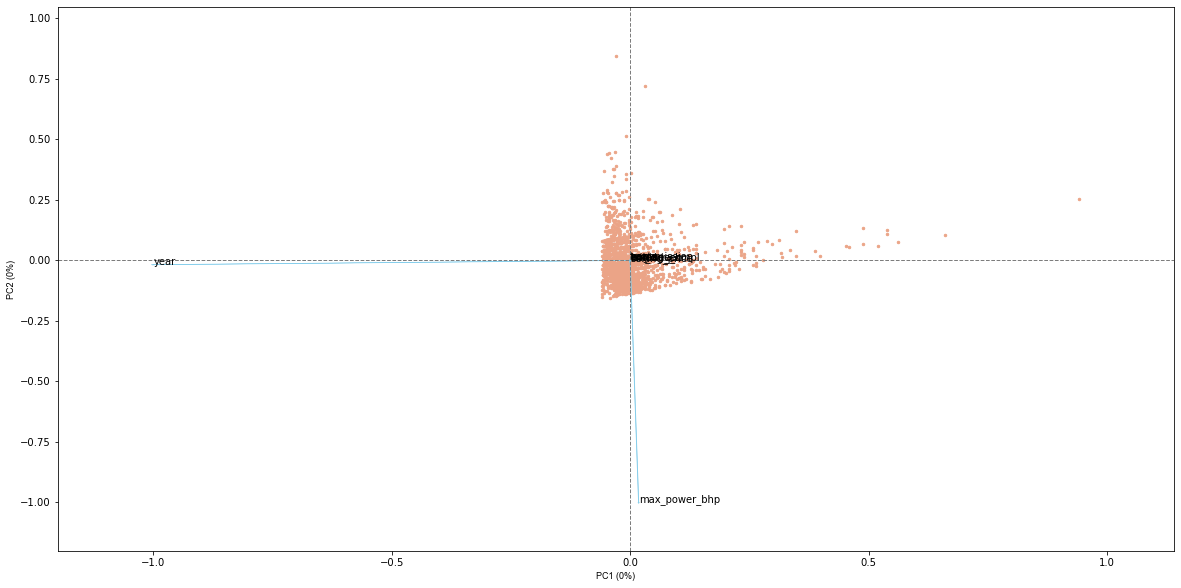

In [18]:
from bioinfokit.visuz import cluster

load = (pca.components_)
cluster.biplot(cscore=CD_pca, loadings=-load, labels=cardata.columns.values,var1=0,var2=0, show=True, dim=(20, 10))

## Extracting segments 

### Using K means 

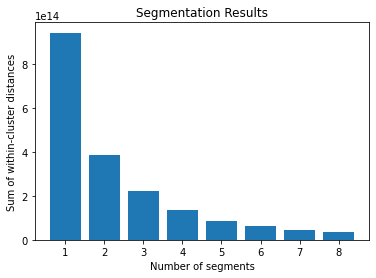

In [20]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
CD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(CD)
    within_cluster_distances.append((kmeans.inertia_))
    CD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

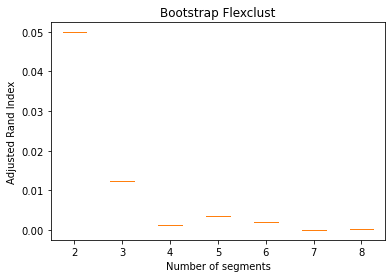

In [21]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234) 
nboot = 100  
nrep = 10  

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(CD.values, random_state=1234) 
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)  
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(CD.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

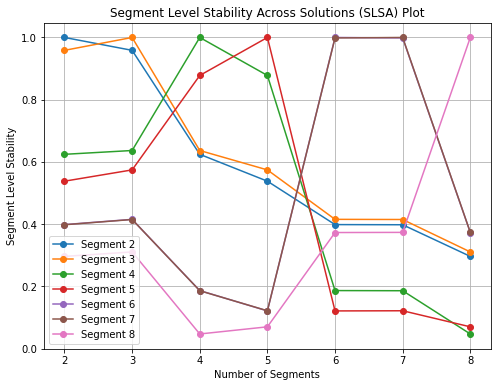

In [27]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = CD_km28[str(segment)].predict(CD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

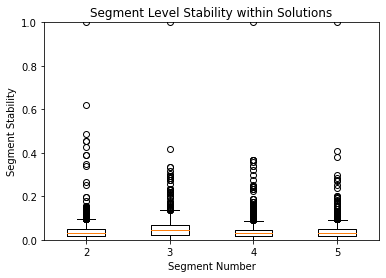

In [28]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = CD_km28[segment].predict(CD)
    segment_similarities[segment] = CD_km28[segment].transform(CD).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

### Using Mixtures of Distribution

In [30]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
CD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(CD.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = CD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    CD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
CD_m28 = pd.DataFrame(CD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(CD_m28)

   iter  converged  k  k0        logLik           AIC           BIC  \
0     9       True  2   2 -3.850847e+14  7.701693e+14  7.701693e+14   
1     5       True  3   3 -2.230980e+14  4.461959e+14  4.461959e+14   
2     6       True  4   4 -1.342461e+14  2.684922e+14  2.684922e+14   
3     7       True  5   5 -8.323453e+13  1.664691e+14  1.664691e+14   
4     8       True  6   6 -6.320743e+13  1.264149e+14  1.264149e+14   
5     8       True  7   7 -4.571937e+13  9.143874e+13  9.143874e+13   
6    13       True  8   8 -3.705095e+13  7.410189e+13  7.410189e+13   

            ICL  
0  7.701693e+14  
1  4.461959e+14  
2  2.684922e+14  
3  1.664691e+14  
4  1.264149e+14  
5  9.143874e+13  
6  7.410189e+13  


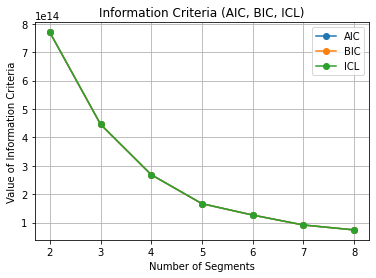

In [31]:
num_segments = CD_m28["k"]
AIC_values = CD_m28["AIC"]
BIC_values = CD_m28["BIC"]
ICL_values = CD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [32]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(CD)
kmeans_clusters = kmeans.predict(CD)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(CD)
gmm_clusters = gmm.predict(CD)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

CD_m4 = CD[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(CD_m4)
k4_m4_clusters = k4_m4.predict(CD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0   1    2    3
kmeans                    
0        518  28   43  520
1          0  25   69   32
2          0   1   14    0
3         92  32  135  448
kmeans    0    1   2    3
kmeans                   
0       370    0   0    0
1         0  150   0    0
2         0    0  40    0
3         0    0   0  440


In [33]:
from sklearn.mixture import GaussianMixture

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(CD)

log_likelihood_m4a = gmm_m4a.score(CD)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(CD)

log_likelihood_m4 = gmm_m4.score(CD)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: -35.84126613115042
Log-likelihood for MD.m4: -35.841305735279995


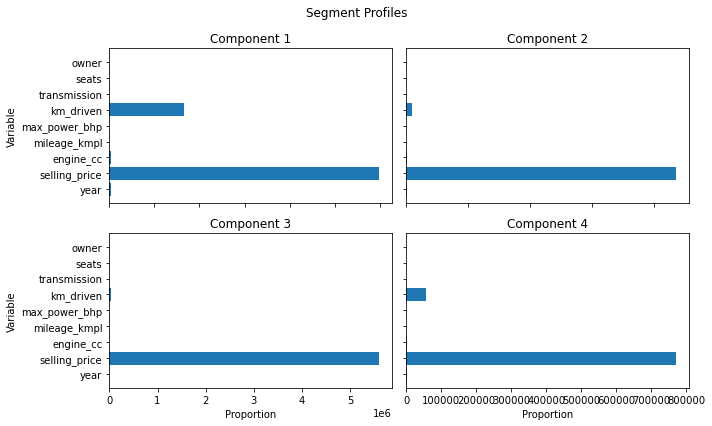

In [36]:
kmeans = CD_km28['4']
labels = kmeans.labels_
CD_mean = CD.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(CD_mean.shape[1]), CD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(CD_mean.shape[1]), CD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(CD_mean.shape[1]), CD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(CD_mean.shape[1]), CD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(CD_mean.shape[1]))
    ax.set_yticklabels(CD.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')
fig.tight_layout()
plt.show()

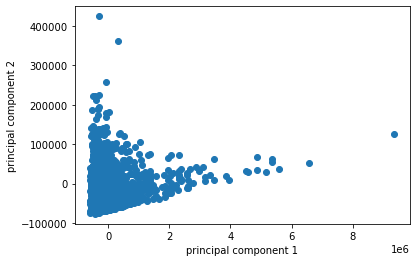

In [37]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(CD)

pca = PCA(n_components=2)
CD_pca = pca.fit_transform(CD)

fig, ax = plt.subplots()

ax.scatter(CD_pca[:, 0], CD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

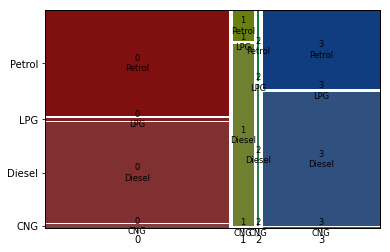

In [44]:
from statsmodels.graphics.mosaicplot import mosaic

CD_k4=CD_km28['4']
k4 = CD_k4.labels_

ct = pd.crosstab(k4, cardata['fuel'])
ct
mosaic(ct.stack(),gap=0.01)
plt.show()

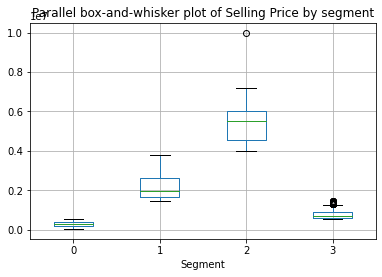

In [43]:
df = pd.DataFrame({'Segment': k4, 'selling_price': cardata['selling_price']})

df.boxplot(by='Segment', column='selling_price')
plt.title('Parallel box-and-whisker plot of Selling Price by segment')
plt.suptitle('')
plt.show()